In [47]:
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('Project_description_and_data/claims_train.csv')

In [30]:
df['DrivAge']=pd.cut(
    df['DrivAge'],
    bins=[17, 25, 35, 50, 65, 100],
    labels= [1, 2, 3, 4, 5],            # 1: 18-25, 2: 26-35, 3: 36-50, 4: 51-65, 5: 65+
    right= True
)

In [40]:
features = ["ClaimNb", "DrivAge", "BonusMalus", "VehPower", "VehAge", "Density"]

from sklearn.preprocessing import StandardScaler

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # for 2D visualization
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

c:\Users\anna-\anaconda3\envs\ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


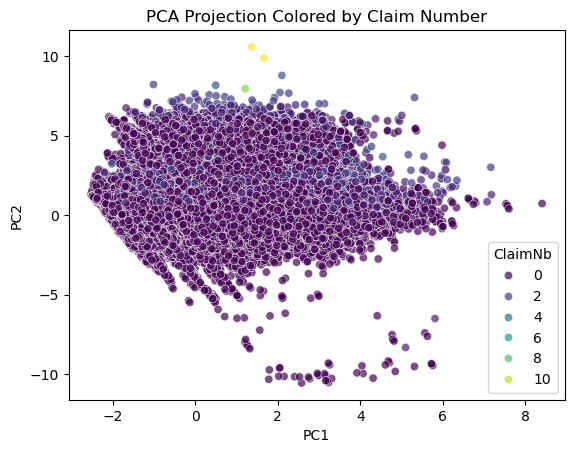

In [41]:
import seaborn as sns

sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="ClaimNb",
    data=df,
    palette="viridis",
    alpha=0.7
)
plt.title("PCA Projection Colored by Claim Number")
plt.show()

In [35]:
explained = pca.explained_variance_ratio_
print(f"PC1: {explained[0]:.2%}, PC2: {explained[1]:.2%}, Total: {explained[:2].sum():.2%}")

PC1: 25.66%, PC2: 18.42%, Total: 44.07%


In [36]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=["PC1", "PC2"],
    index=features
)
print(loadings)

                 PC1       PC2
ClaimNb     0.050922  0.240584
DrivAge    -0.679120 -0.015952
BonusMalus  0.694044  0.099525
VehPower   -0.146615  0.243666
VehAge      0.170337 -0.597698
Density     0.063209  0.717875


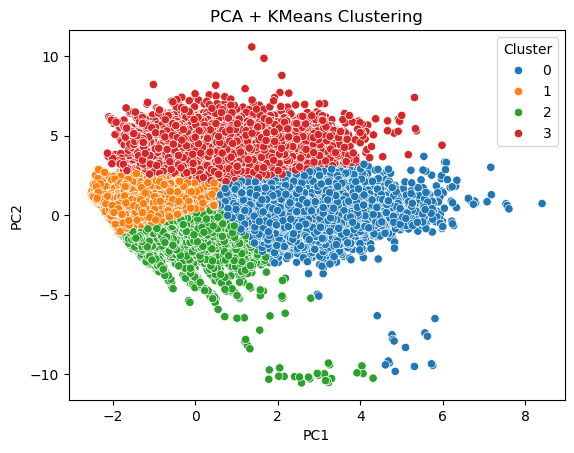

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_pca)

sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df, palette="tab10")
plt.title("PCA + KMeans Clustering")
plt.show()
